In [9]:
'''
Code for the toutnament and the "iterated tournament" with a simple evolution of the participants: the looser is 
eliminated and one more participants with the same stategy of the winner is addes
'''

import itertools

#Function for the tournament
def tournament(participants={},N_gironi=1,N_rounds = 10, M = Payoff):
    
    # Retrieve only the names of the strategies repeated as many times as their frequency allows.
    player_list_from_dict = []
    for item in (list(participants.keys())):
        for i in range (participants[item]):
            player_list_from_dict.append(item)
            
    # Compute the combinations
    b = list(itertools.combinations(player_list_from_dict, 2))
    N_match = len(b)
    
    # List that will be used to have the scores of each match by the side of the two opponents
    list_with_scores = b
    
    # Loop over the combinations one by one
    for i in range (N_match):
        
        # Player1 and Player2 strategies
        player1 = b[i][0]
        player2 = b[i][1]
        
        # Player1 and Player2 parameters: [0] is the frequency, [1] is the list of parameters
        #param1  = participants[player1][1]
        #param2  = participants[player2][1]
        
        # Initiliaze an empty list to store the results over the match
        AllRewards = []
        
        # Do the match between the two players and update the rewards; The ordered syntax for match is:
        # match( key_1, key_2, parameter_list_1, parameter_list_2, N_rounds = 10, M = Payoff ) : 
        AllRewards =  match(player1, player2, N_rounds, M)
        
        # Retrieve the final scores for Player1 and Player2 as the last element in the list
        R1, R2 = AllRewards[-1][0], AllRewards[-1][1]
        list_with_scores[i] += (R1,R2)
        
    # Un-comment the following print to debug
    #for item in list_with_scores: print(item)
    
    # Good, now each combination has the corresponding score: we now need to assign it to the respective players and calculate the final score
    strat = list(participants.keys())
    freq = [participants[key] for key in strat]
    named =[]
    
    # Add identification to the layer trough the use of a numerical value from 1 up to their frequency BUT PRESERVE THE ORDER
    for key,f in zip (strat,freq):
        for j in range(1,f+1):
            if (f!=0):
                named.append(key + str(j))
                
    # Compute the permutations preserving the order
    with_names = list(itertools.combinations(named,2))
    
    # Copy the scores for each match over to the ones with identification
    # In list_with_scores[I][J] we have: I = ordered number of the combination, and J:
    # J=0 is 1st strategy; J=1 is 2nd strategy; J=2 is Player1 score; J=3 is Player2 score
    for i in range (N_match): with_names[i] += (list_with_scores[i][2],list_with_scores[i][3] )
    
    # Un-comment the following print to debug
    #for item in with_names: print(item)

    # Compute the score for each named player and add it to the list
    FinalScores = []
    for player in named:
        SumOver1 = np.sum([ with_names[i][2] for i in range (N_match) if (with_names[i][0] == player) ])
        SumOver2 = np.sum([ with_names[i][3] for i in range (N_match) if (with_names[i][1] == player) ])
        FinalScores.append(SumOver1 + SumOver2)
        
    Results = named
    
    for i in range (len(Results)):
        Results[i] = (Results[i],FinalScores[i])
    #Results += tuple( FinalScores )

    # return an ordered list of tuple with the name of the winner (his strategy) and the score. The first is the winner, the last the looser
    return ( sorted(Results, key=lambda x: x[1], reverse=True) )    


In [10]:
# Tournament function test
test_part = {
    'NiceGuy' : 0,
    'BadGuy' : 2,
    'MainlyNice' : 0,
    'MainlyBad' : 0,
    'TitForTat' : 2,
    'RandomGuy' : 0,
    'ResentfulGuy' : 0,
    'TrustingGuy' : 0,
    'Thanos' : 0,
    'MidResentful': 0,
    'ReverseTft': 0
}


result = tournament(test_part,N_gironi=1,N_rounds = 100, M = Payoff)
for item in result: print(item) 
len(test_part)

('TitForTat1', 398)
('TitForTat2', 398.0)
('BadGuy1', 304.0)
('BadGuy2', 304)


11

In [11]:
# The iterated tournament function is slightly different; Inside the function the tournament is repeated thanks to a 
# while loop and the result is a list of lists of tuples with the final scores of each tournament

#Try to iterate the tournament process: new parameter "r" to set the number of iterations of the tournament
def r_tournament(participants={},N_gironi=1,N_rounds = 10, r=50, M = Payoff):
    
    #set a counter for the while loop
    t_counter = 0 
    #array to store all the results of each tournamen
    classification = [] 
    # create a data frame to memorize the strategies at the start of each tournament
    data_frames = []
    time_evolution_0 = pd.DataFrame(list(participants.items()),columns = ['Strategies','N'])
    time_evolution_0['tournament'] = t_counter 
    data_frames.append(time_evolution_0)

    # start the while loop in order to iterate the tournament. The number of iterations is set at the start (default r=5)
    while t_counter < r:
        
        # Call the function to play the tournament and append the results 
        classification.append(tournament(participants,N_gironi,N_rounds, M))
        
        #Update the participants dictionary: remove the last classified and add one more player with the winning strategy
        looser = classification[t_counter][-1][0] 
        winner = classification[t_counter][0][0]
        looser_points = classification[t_counter][-1][1] 
        winner_points = classification[t_counter][0][1] 
        print(winner, winner_points, looser, looser_points)
        if (winner_points == looser_points): break
        
        #retrieve the strategy name to eliminate/increase in the dictionary removing the numerical characters
        l_strategy = ''.join([char for char in looser if char.isalpha()])
        w_strategy = ''.join([char for char in winner if char.isalpha()])
        
        #increase/decrease the presence of the winner/looser strategies
        participants[l_strategy] -= 1
        participants[w_strategy] += 1
        
        #test
        #time_evolution['tournament'] += t_counter

        #update the counter 
        t_counter += 1 

        #update the data frame for the time evolution with a new column
        #new_line = [ s[1] for s in list(participants.items())]
        #time_evolution.loc[len(time_evolution)] = new_line
        time_evolution_i = pd.DataFrame(list(participants.items()),columns = ['Strategies','N'])
        time_evolution_i['tournament'] = t_counter 
        data_frames.append(time_evolution_i)

    data_frame_tot = pd.concat(data_frames, axis=0)
    
    return ( classification, data_frame_tot )  

In [12]:
import pandas as pd

# Iterated tournament function test
test_part = {
    'NiceGuy' : 3,
    'BadGuy' : 10,
    'MainlyNice' : 5,
    'MainlyBad' : 2,
    'TitForTat' : 5,
    'RandomGuy' : 5,
    'ResentfulGuy' : 4,
    'TrustingGuy' : 1,
    'Thanos' : 2,
    'MidResentful': 3,
    'ReverseTft': 6,
    'ScammingGuy': 4
}

result, time_evolution = r_tournament(test_part,r=300,N_rounds = 20, M = Payoff)
print(result)

BadGuy8 1682 NiceGuy3 906
BadGuy6 1638 NiceGuy2 872
ResentfulGuy2 1602 NiceGuy1 854.0
ResentfulGuy4 1599 ReverseTft4 915
ResentfulGuy3 1619 ReverseTft2 856
ResentfulGuy4 1576 ReverseTft3 860
ResentfulGuy2 1569 ReverseTft3 851
MidResentful1 1538 ReverseTft1 817
MidResentful4 1547 ReverseTft1 827
MidResentful4 1546 MainlyNice4 1090
MidResentful1 1555 RandomGuy3 1057
MidResentful5 1558 RandomGuy1 1006
MidResentful4 1561 RandomGuy1 1028
MidResentful4 1573 MainlyNice2 1077
TitForTat1 1576 MainlyBad2 1072
TitForTat2 1589 RandomGuy2 1033
TitForTat6 1600 TrustingGuy1 1063
TitForTat2 1611 MainlyBad1 1151
TitForTat1 1632 RandomGuy1 1037
TitForTat3 1641 BadGuy12 1138
TitForTat3 1667 BadGuy10 1136
TitForTat8 1682 BadGuy2 1142
TitForTat6 1704 BadGuy8 1148
TitForTat12 1729 BadGuy8 1146
TitForTat6 1744 BadGuy6 1154
TitForTat6 1765 BadGuy4 1152
TitForTat11 1788 BadGuy5 1154
TitForTat7 1807 BadGuy1 1164.0
TitForTat8 1828 BadGuy1 1160.0
TitForTat9 1853 BadGuy2 1162
TitForTat4 1871 BadGuy1 1176.0
TitForT

In [13]:
# Selezionare il secondo elemento di ogni tupla nella prima lista
secondi_elementi = [tupla[1] for tupla in result[0]]
print(secondi_elementi)

[1682, 1664, 1646, 1642, 1636, 1636, 1632, 1628, 1626, 1624, 1618, 1608, 1597, 1581, 1578, 1577, 1575, 1572, 1567, 1560.0, 1559, 1513, 1503, 1496, 1496, 1494, 1490, 1459, 1446, 1383, 1343, 1336, 1326, 1262, 1250, 1246, 1224, 1208, 1158, 1143, 1140, 1106, 1100, 1092, 1085, 1084, 1057, 948, 932.0, 906]


<BarContainer object of 11 artists>

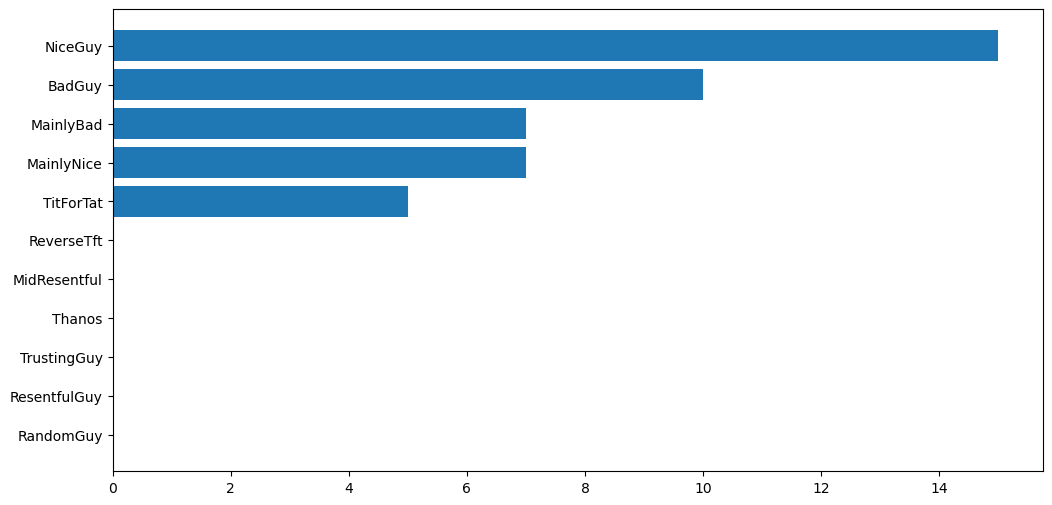

In [12]:
import matplotlib.pyplot as plt
import matplotlib. animation as animation

#frame = time_evolution_tot['tournament'].unique()

fig, ax = plt.subplots(figsize=(12,6))

#def animate(frame):
#    ax.clear()
data_frame = time_evolution[time_evolution['tournament']==0]
top_strategies = data_frame.nlargest(len(test_part),'N').sort_values('N',ascending=True)
ax.barh(top_strategies['Strategies'],top_strategies['N'])
    #ax.set_title(f'Time Step: {i}')
    #ax.set_xlim(0, time_evolution.values.max() + 1)  # Imposta il limite dell'asse x per una visualizzazione coerente


#anim = animation.FuncAnimation(fig, animate, frames=frame, interval=500)
#plt.show()


Frame: 0
      Strategies   N  tournament
0        NiceGuy   3           0
1         BadGuy  10           0
2     MainlyNice   5           0
3      MainlyBad   2           0
4      TitForTat   5           0
5      RandomGuy   5           0
6   ResentfulGuy   4           0
7    TrustingGuy   1           0
8         Thanos   2           0
9   MidResentful   3           0
10    ReverseTft   6           0
11   ScammingGuy   4           0
Frame: 0
      Strategies   N  tournament
0        NiceGuy   3           0
1         BadGuy  10           0
2     MainlyNice   5           0
3      MainlyBad   2           0
4      TitForTat   5           0
5      RandomGuy   5           0
6   ResentfulGuy   4           0
7    TrustingGuy   1           0
8         Thanos   2           0
9   MidResentful   3           0
10    ReverseTft   6           0
11   ScammingGuy   4           0
Frame: 1
      Strategies   N  tournament
0        NiceGuy   2           1
1         BadGuy  11           1
2     MainlyNice

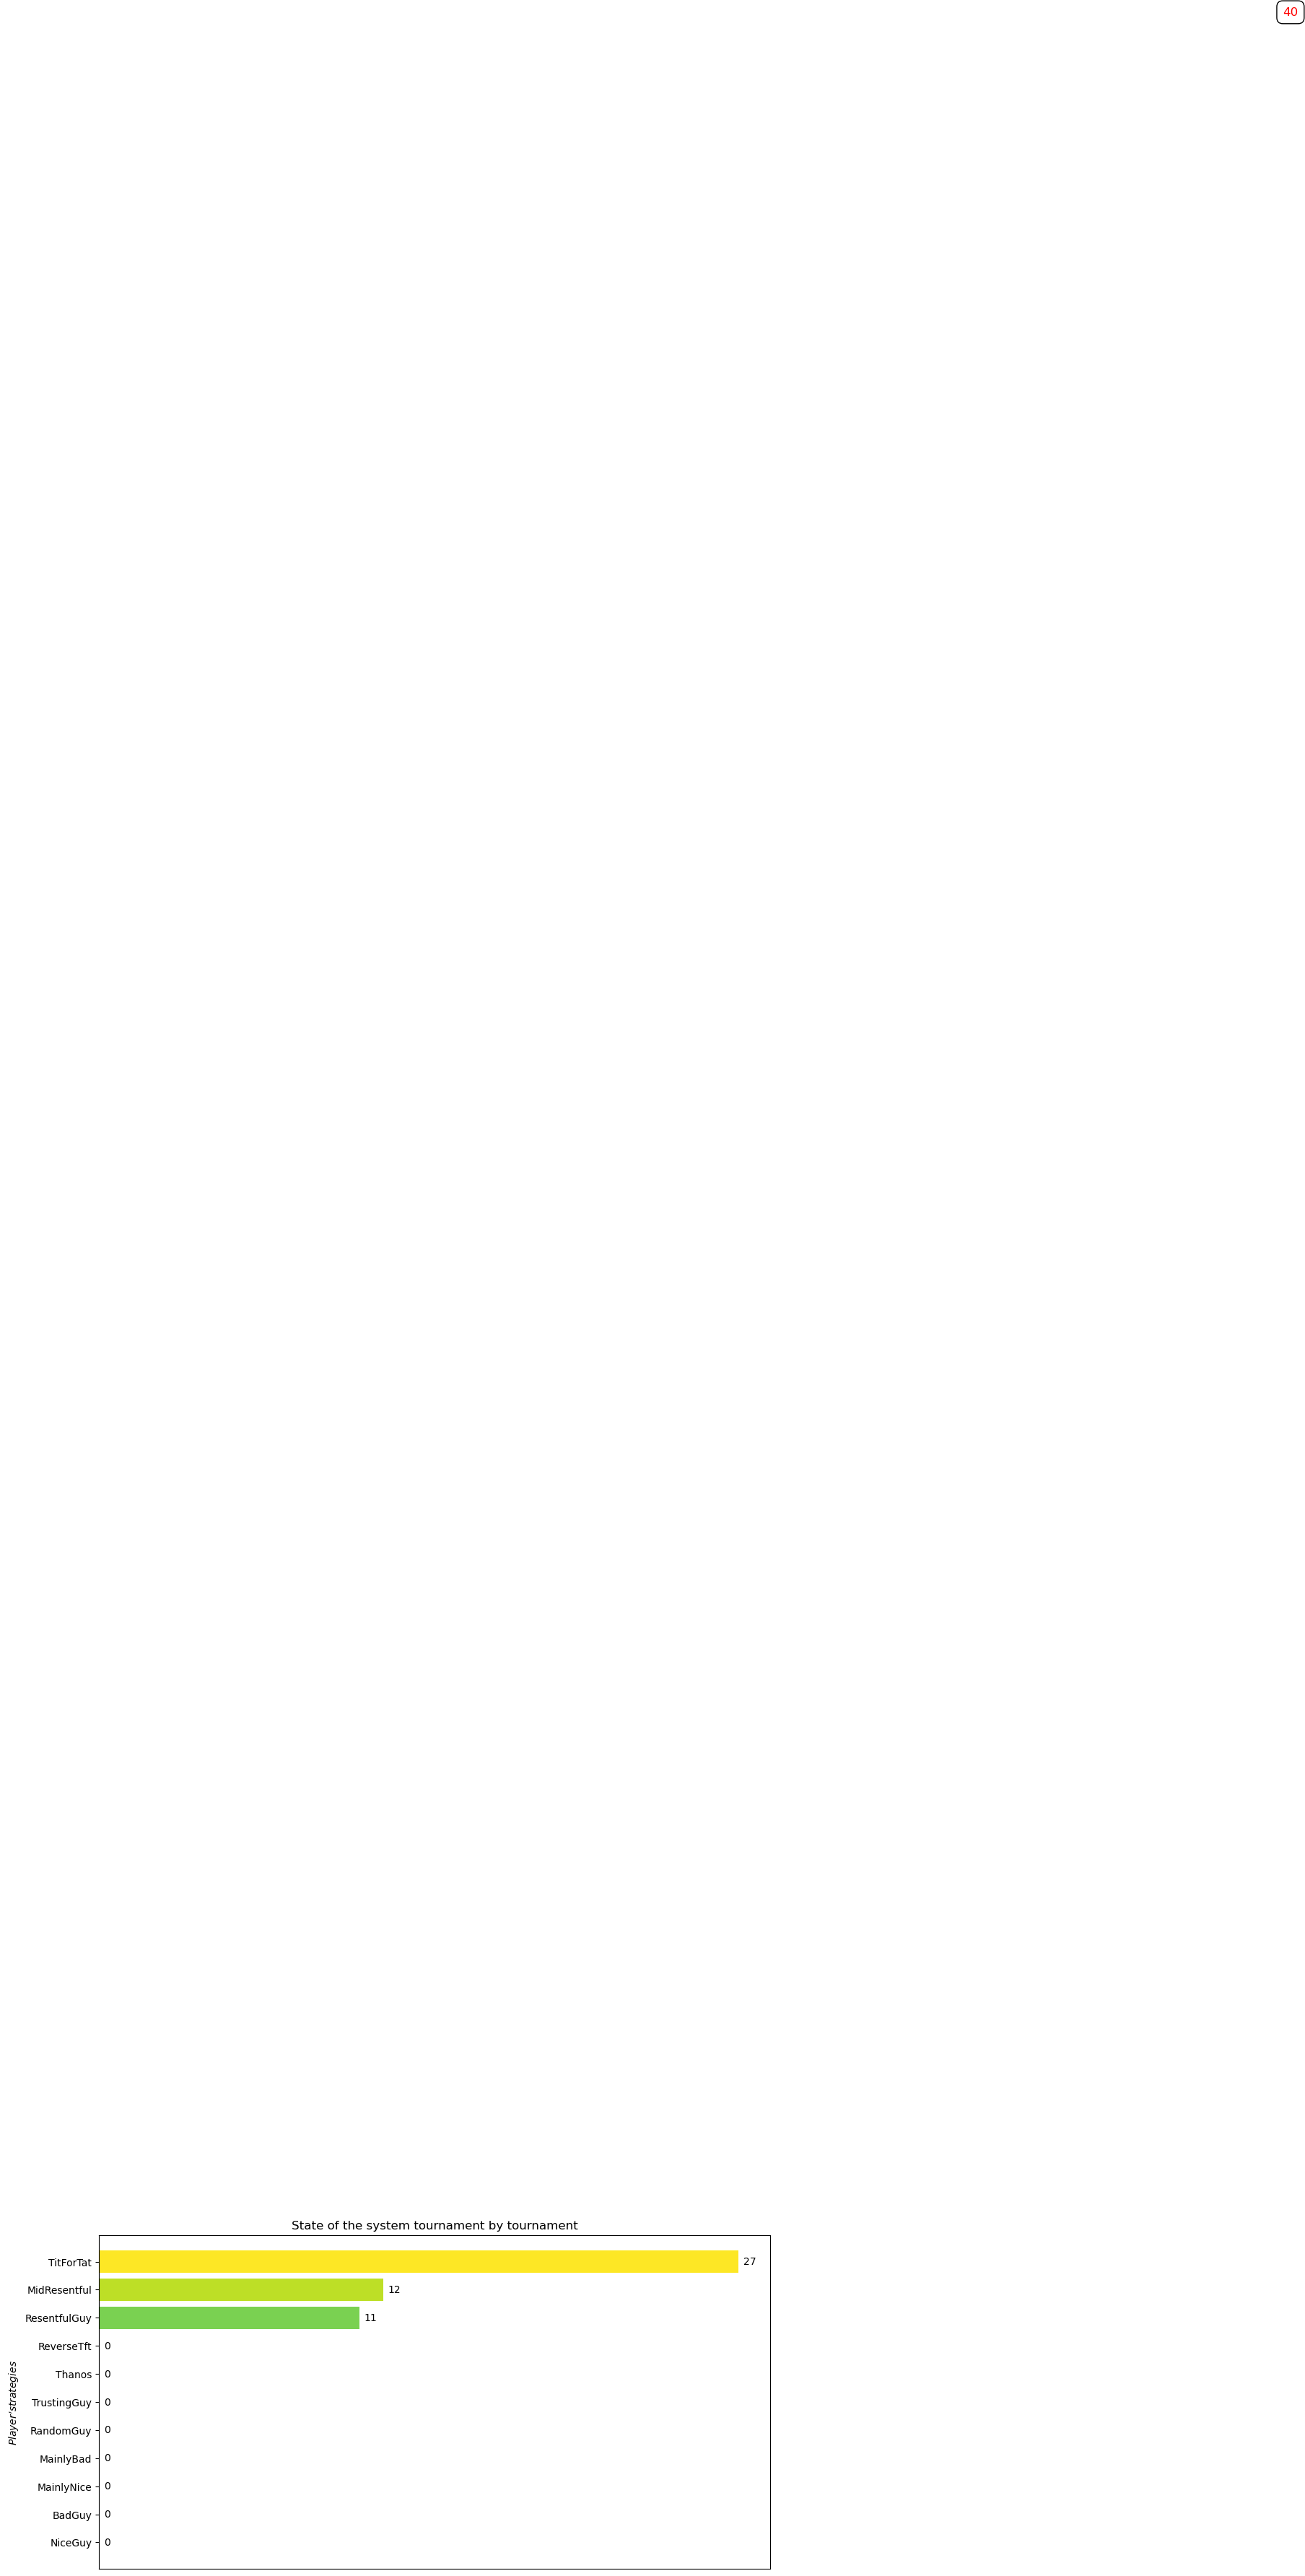

In [14]:
import matplotlib.pyplot as plt
import matplotlib. animation as animation
import matplotlib.colors as matcol

frame = time_evolution['tournament'].unique()

#---------------------------------------COLORS-----------------------------------------------------------------
# Numero di colori da generare
n_colors = 11

# Selezione del colormap (puoi scegliere tra diverse opzioni come 'viridis', 'plasma', 'inferno', ecc.)
colormap = plt.cm.viridis

# Generazione dei colori sfumati
colors = [colormap(i) for i in np.linspace(0, 1, n_colors)]

# Converti i colori RGBA in codici colore hex
colors_hex = [matcol.rgb2hex(c) for c in colors]



fig, ax = plt.subplots(figsize=(12,6))
ax.set_xticks([])  # Rimuove i tick dell'asse X
ax.set_xticklabels([])  # Rimuove le etichette dell'asse X
ax.set(ylabel='$Player\'s trategies$',title = "State of the system tournament by tournament")

def animate(frame):
    ax.clear()
    data_frame = time_evolution[time_evolution['tournament'] == frame]

    # Debugging output per verificare i dati
    print(f"Frame: {frame}")
    print(data_frame)

    if not data_frame.empty:
        sorted_strategies = data_frame.nlargest(11,'N').sort_values('N',ascending=True)
        barh = ax.barh(sorted_strategies['Strategies'],sorted_strategies['N'], 
                color = colors_hex,
                )
    
        ax.bar_label(barh, padding = 5)
        ax.set_xticks([])  # Rimuove i tick dell'asse X
        ax.set_xticklabels([])  # Rimuove le etichette dell'asse X
        ax.set(ylabel='$Player\'s trategies$',title = "State of the system tournament by tournament")

        T = str(frame)
        plt.text(50,90,T, fontsize=12, color='red', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
        
    else:
        print(f"No data for tournament: {frame}")

global anim
anim = animation.FuncAnimation(fig, animate, frames=frame, interval=500)

# Salva l'animazione in un file .gif usando Pillow
anim.save('animazione.gif', writer='pillow')

# Mostra l'animazione
plt.show()

# Ritorna l'oggetto animazione per evitare che venga garbage collected
anim



In [25]:
#patologic starting situation
test_part = {
    'NiceGuy' : 4,
    'BadGuy' : 2,
    'MainlyNice' : 1,
    'MainlyBad' : 2,
    'TitForTat' : 5,
    'RandomGuy' : 4,
    'ResentfulGuy' : 4,
    'TrustingGuy' : 3,
    'Thanos' : 2,
    'MidResentful': 2,
    'ReverseTft': 1
}
